In [1]:
import os
import pandas as pd
import numpy as np
import sys
import pickle
os.chdir('/scratch/nick/MSMC-Curve-Analysis/MSMC_clustering/')
from MSMC_clustering import Msmc_clustering

In [ ]:
os.listdir()

# Testing simplified MSMC_clustering library
https://github.com/nick33333/MSMC_clustering.git

In [36]:
time_window = [1.17E4, 2.58E6]
# time_window=False
mu_dict = {'bird':1.4e-9,
          'mammal':2.2e-9}
time_series_path = '/scratch/nick/MSMC-Curve-Analysis/data/msmc_curve_data_birds/'
# time_series_path = '/scratch/nick/MSMC-Curve-Analysis/test_case_data/'
generation_lengths_path = '/scratch/nick/MSMC-Curve-Analysis/data/generation_lengths/'
m_obj = Msmc_clustering(directory=time_series_path,
                        mu=1.4e-9,
                        generation_time_path=generation_lengths_path,
                        to_omit=[],
                        exclude_subdirs=['mammals_part_1'],
                        manual_cluster_count=7,
                        algo='kmeans',
                        data_file_descriptor='.txt',
                        omit_front_prior=5,
                        omit_back_prior=0,
                        time_window=time_window,
                        time_field='left_time_boundary',
                        value_field='lambda',
                        interpolation_pts=100,
                        use_interpolation=True,
                        use_friendly_note=True,
                        use_real_time_and_c_rate_transform=True,
                        use_value_normalization=True,
                        use_time_log10_scaling=True,
                        use_plotting_on_log10_scale=False,
                        sep='\t')

FRIENDLY NOTE 1 if getting err while reading data for Msmc_clustering:                     
By default, Msmc_clustering reads data from directory: <> using pd.read_csv with default params.                     
MAKE SURE TO SPECIFY YOUR DESIRED sep. sep is read in through **readfile_kwargs and is a param                     
in pd.read_csv. pd.read_csv has sep=',' by default. If the data held in <> are .tsv                     
files, <sep = '	'>
.txt type:  <class 'str'>

READING DATA
read_file summary:
omit_front_prior=5
omit_back_prior=0

fileLen: 11126
duplicate entries: 0
fileLen: 5427
duplicate entries: 0
len of my series after windowing: 238

FRIENDLY NOTE 2 if getting nothing in mySeries after reading data with Msmc_clustering:                     
Depending on the time_window you select, there may be no points in your input data which                     
fit into the time_window. Make sure time window is in real time (this means you need to set                     
use_real_ti

/scratch/nick/MSMC-Curve-Analysis/MSMC_clustering/MSMC_clustering.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[time_field] = log10_with_zero(series[time_field])
/scratch/nick/MSMC-Curve-Analysis/MSMC_clustering/MSMC_clustering.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[value_field], flat_curve = normalize_series_column(series[value_field]) # Where flat_curve's redudancy shows


In [37]:
len(pickle.dumps(m_obj.name2series))

426963

In [41]:
for i in m_obj.namesofMySeries:
    if "Picoides_pubescens" in i or "Picoides" in i:
        print(i)

cleanSeries_with_df: 230,
mySeries: 230
len of series in mySeries: 100
Clustering 100/100
Omitting 0 points from front and 0 from back
kmeans dtw
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 0
Computed dists of shape: (230, 230)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 230
label len: 230
num to plot : 7
curve cluster plot shape: (3, 3)


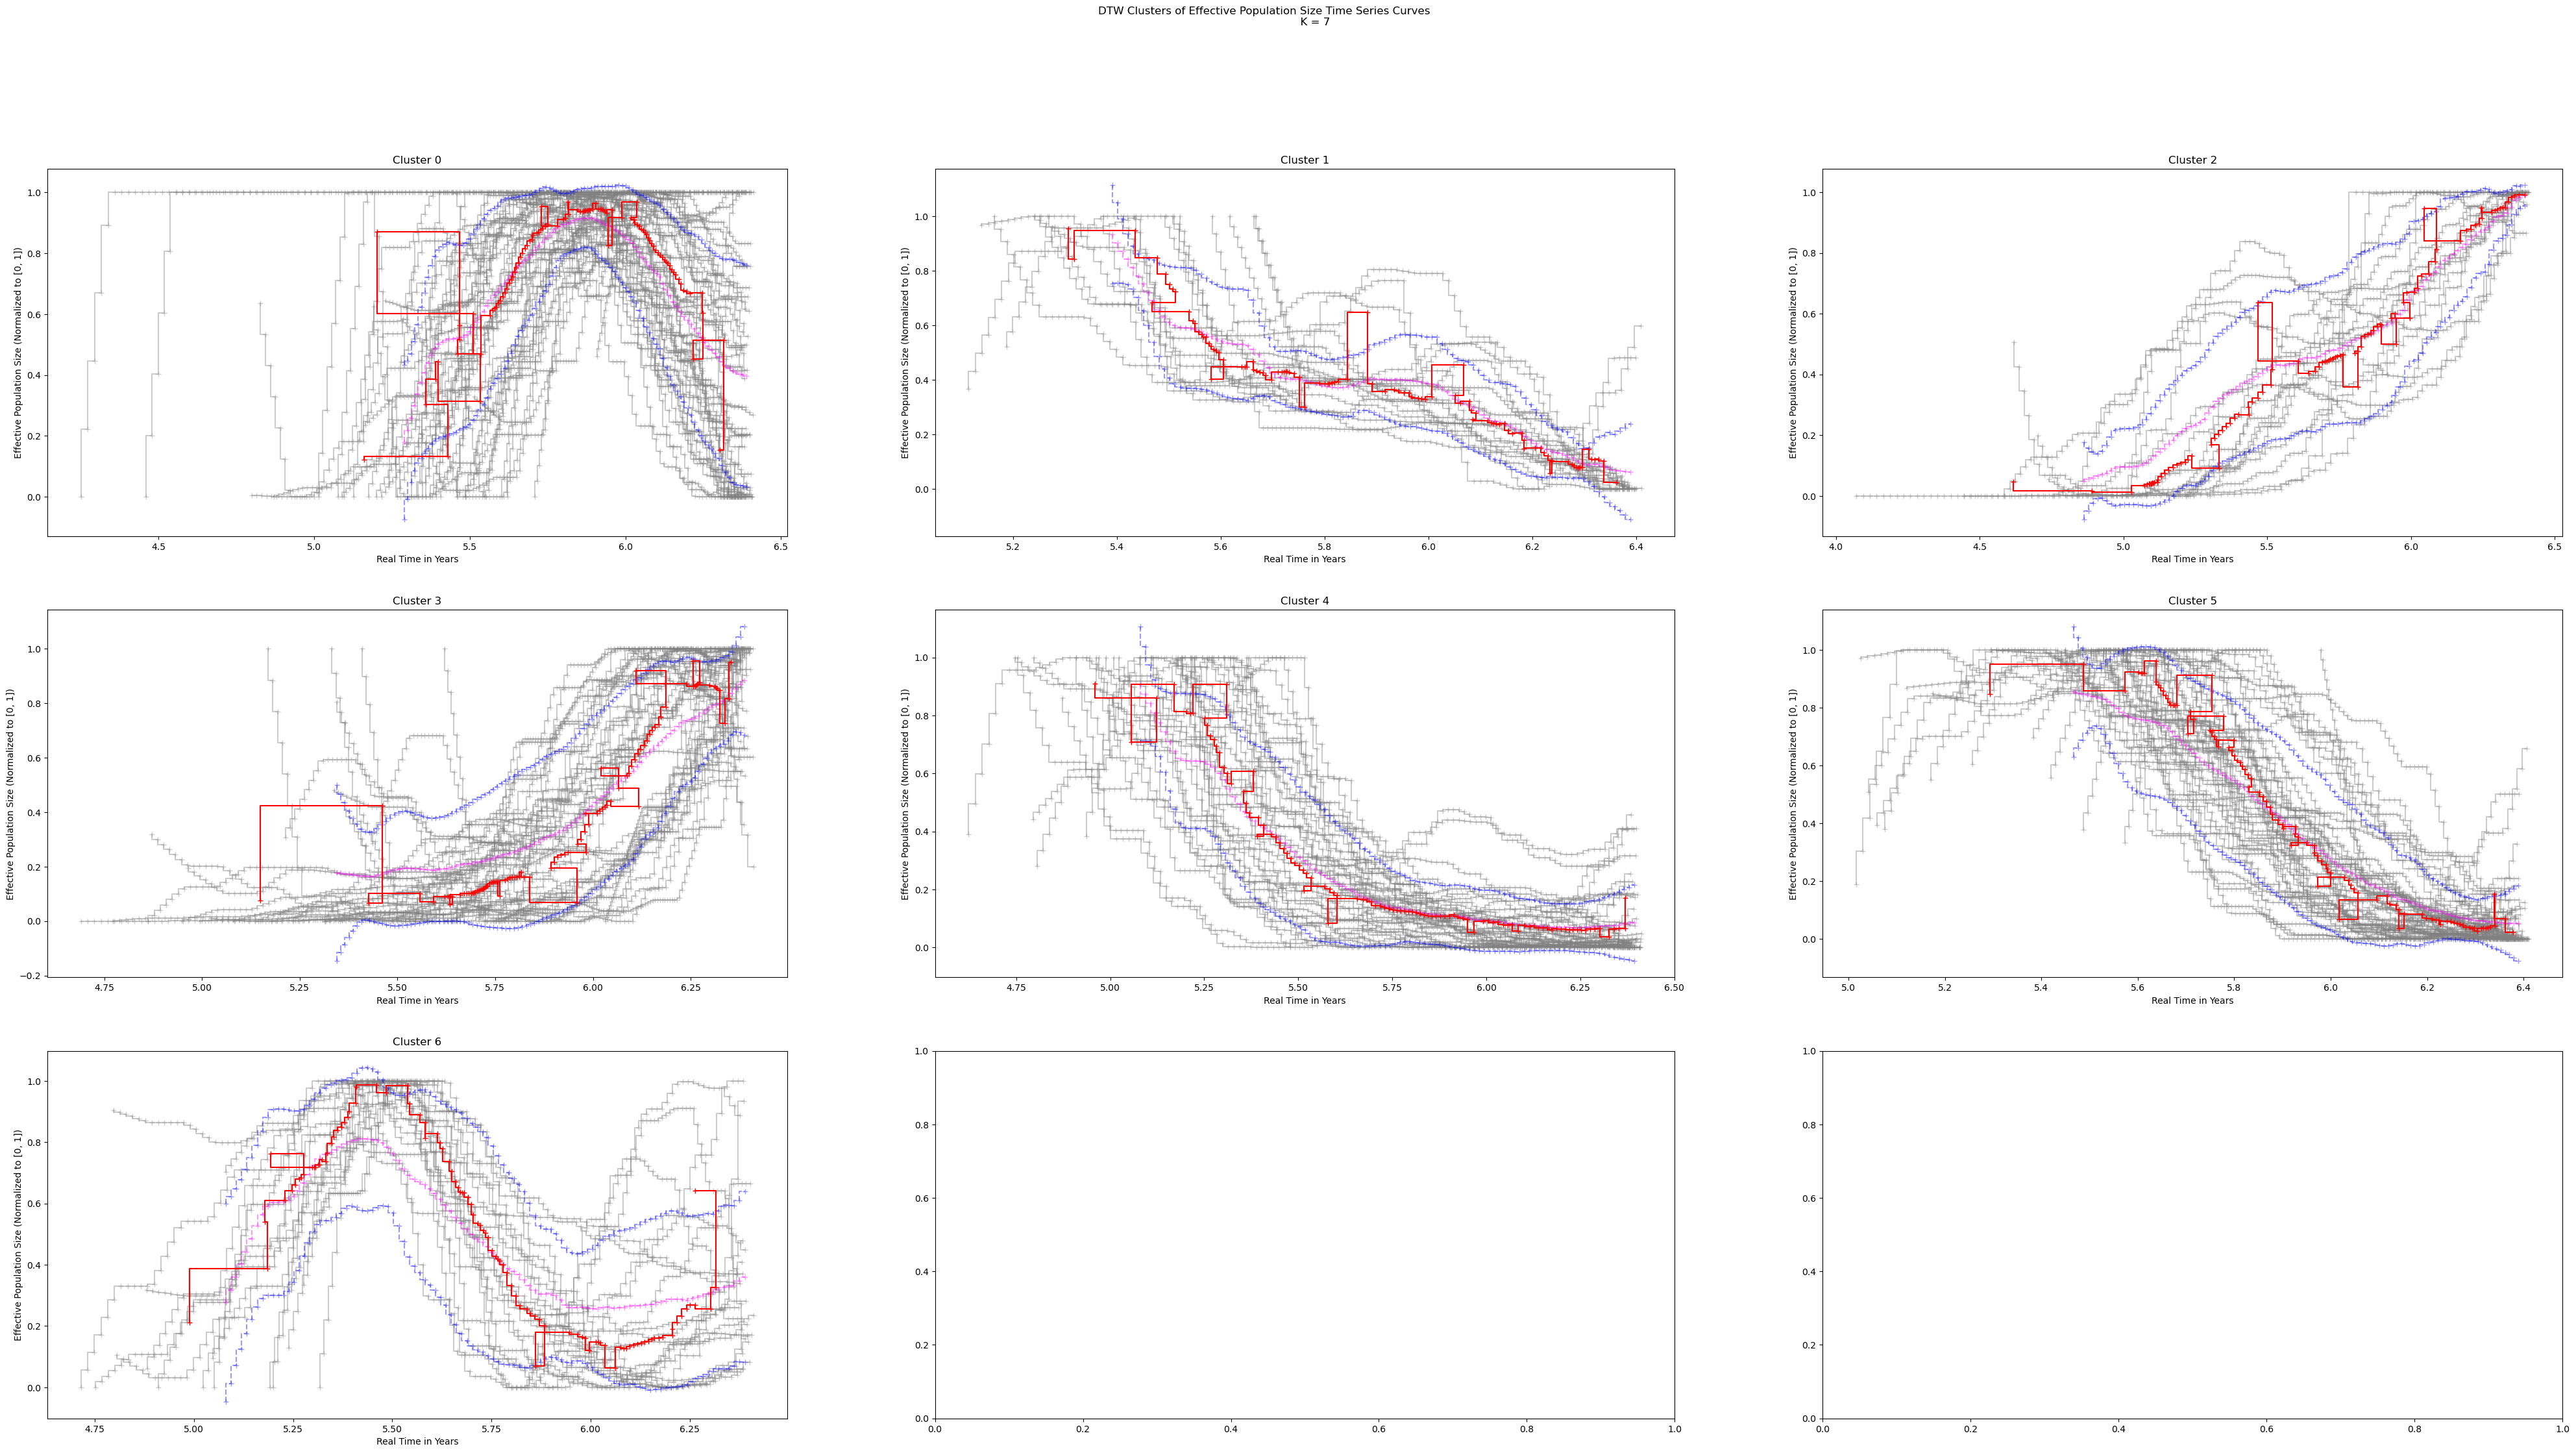

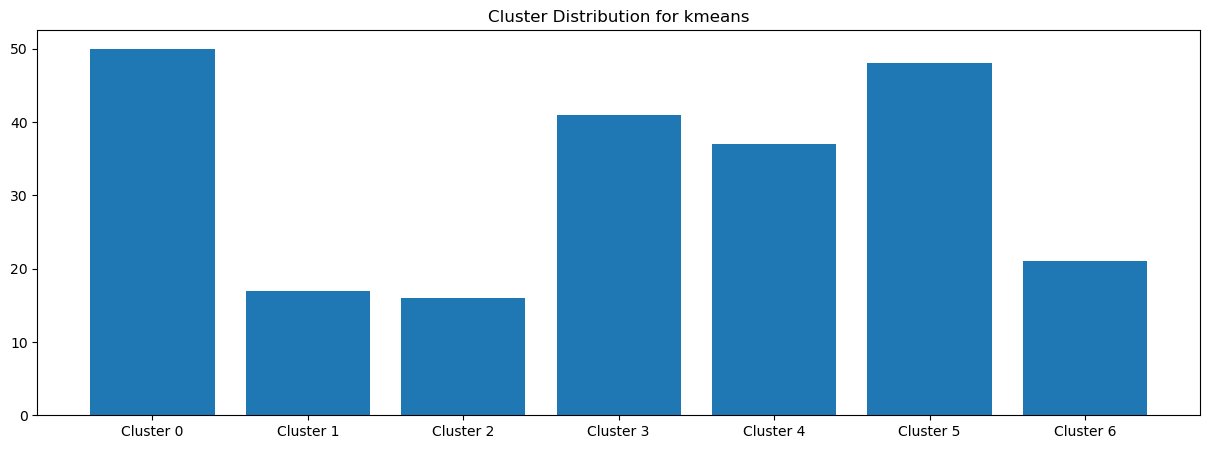

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [38]:
m_obj.cluster_curves(fs_x=50,
                     fs_y=25,)

cleanSeries_with_df: 230,
mySeries: 230
len of series in mySeries: 59
Clustering 59/59
Omitting 0 points from front and 0 from back
kmeans dtw
type of cleanSeries <class 'numpy.ndarray'>
Number of flat time series curves: 0
Computed dists of shape: (230, 230)
<class 'tslearn.clustering.kmeans.TimeSeriesKMeans'>
sample len: 230
label len: 230
num to plot : 7
curve cluster plot shape: (3, 3)


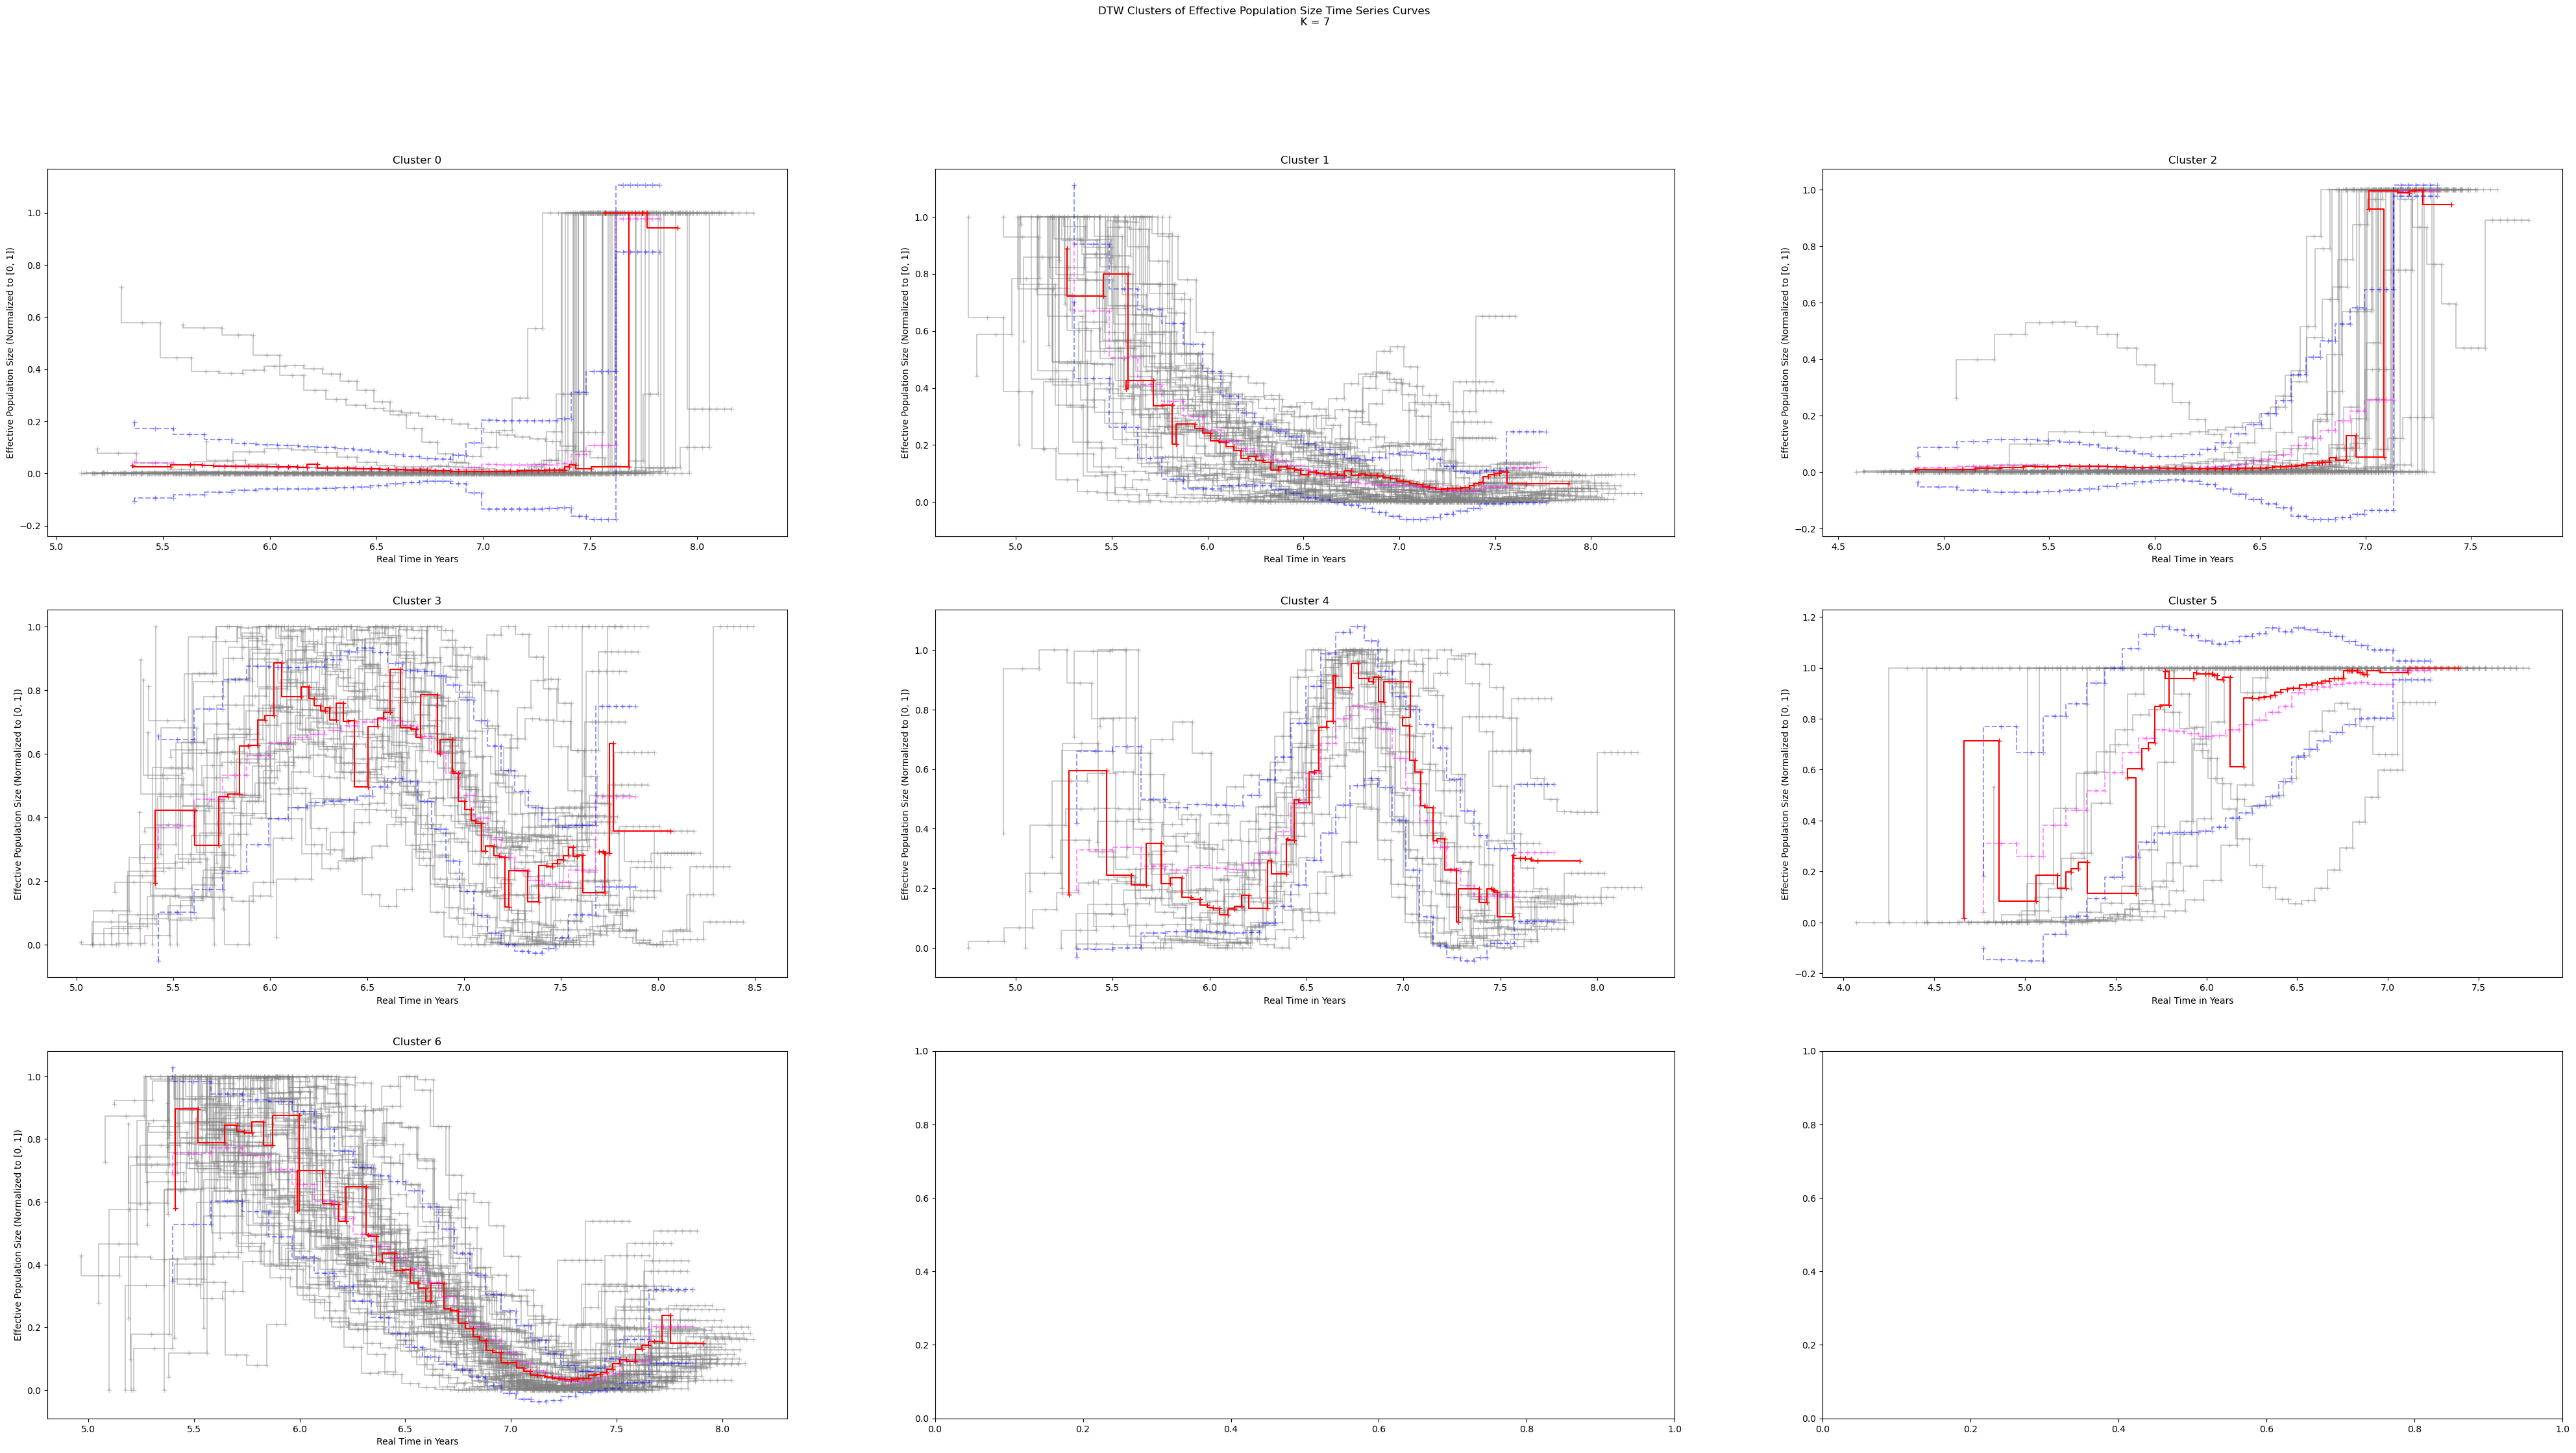

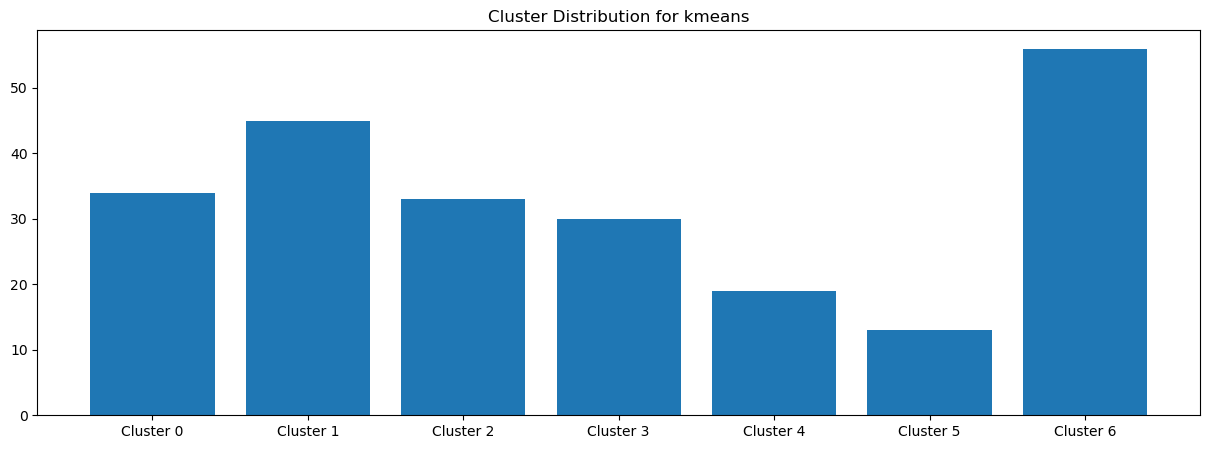

DID I CLOSE THE PLOT??? PLEASE TELL ME I DID!


In [8]:
m_obj.cluster_curves(fs_x=50,
                     fs_y=25)

In [6]:
from tslearn.clustering import TimeSeriesKMeans

In [7]:
km = TimeSeriesKMeans(n_clusters=7, metric='dtw')

In [8]:
X = np.array([i.to_numpy() for i in m_obj.mySeries])
preds = km.fit_predict(X)
# X.shape

In [9]:
preds

array([0, 6, 1, 4, 3, 1, 1, 1, 1, 3, 1, 2, 0, 1, 4, 4, 4, 6, 2, 6, 2, 5,
       6, 2, 0, 2, 1, 1, 6, 5, 6, 1, 6, 2, 1, 0, 3, 1, 2, 3, 2, 3, 2, 3,
       0, 0, 3, 0, 3, 5, 6, 1, 3, 1, 6, 3, 6, 6, 6, 1, 6, 1, 0, 6, 3, 1,
       0, 6, 0, 1, 6, 2, 5, 5, 2, 6, 6, 6, 4, 5, 5, 1, 6, 2, 2, 5, 2, 4,
       2, 2, 6, 0, 6, 2, 6, 5, 3, 6, 1, 0, 6, 3, 6, 3, 2, 1, 5, 6, 5, 0,
       5, 0, 4, 0, 0, 0, 0, 3, 2, 0, 6, 0, 5, 3, 4, 1, 3, 6, 6, 2, 3, 2,
       0, 3, 6, 2, 6, 5, 1, 0, 3, 6, 0, 3, 6, 6, 6, 6, 1, 3, 1, 5, 6, 3,
       4, 2, 0, 6, 0, 1, 1, 6, 0, 0, 1, 6, 2, 6, 3, 3, 4, 0, 3, 3, 6, 6,
       3, 6, 1, 6, 4, 4, 2, 6, 0, 6, 1, 6, 0, 6, 5, 6, 6, 2, 5, 2, 0, 4,
       5, 6, 6, 3, 2, 6, 6, 5, 0, 6, 6, 6, 6, 3, 1, 1, 3, 1, 6, 3, 5, 0,
       3, 5, 5, 1, 1, 1, 6, 6, 6, 0])

In [10]:
size_estimate = len(pickle.dumps(m_obj.gen_time_dict))
size_estimate

511888

In [11]:
size_estimate = len(pickle.dumps(m_obj.mySeries))
size_estimate

264559

In [12]:
size_estimate = len(pickle.dumps(m_obj.name2series))
size_estimate

276065

In [13]:
size_estimate = len(pickle.dumps(m_obj.namesofMySeries))
size_estimate

11522

In [14]:
m_obj.namesofMySeries

['Casuarius_casuarius_GCA_013396415.1_msmc2.final',
 'Anseranas_semipalmata_GCA_013399115.1_msmc2.final',
 'Sakesphorus_luctuosus_GCA_013396695.1_msmc2.final',
 'Anhinga_rufa_GCA_013400875.1_msmc2.final',
 'Dromas_ardeola_GCA_013398915.1_msmc2.final',
 'Nicator_chloris_GCA_013400495.1_msmc2.final',
 'Pachycephala_philippinensis_GCA_013397055.1_msmc2.final',
 'Mystacornis_crossleyi_GCA_013400655.1_msmc2.final',
 'Chloroceryle_aenea_GCA_013399075.1_msmc2.final',
 'Rhipidura_dahli_GCA_013399225.1_msmc2.final',
 'Rissa_tridactyla_GCA_013401015.1_msmc2.final',
 'Myiagra_hebetior_GCA_013397015.1_msmc2.final',
 'Loxia_curvirostra_GCA_013398455.1_msmc2.final',
 'Upupa_epops_GCA_013397515.1_msmc2.final',
 'Picathartes_gymnocephalus_GCA_013390045.1_msmc2.final',
 'Scopus_umbretta_GCA_013400535.1_msmc2.final',
 'Sagittarius_serpentarius_GCA_013399415.1_msmc2.final',
 'Melanocharis_versteri_GCA_013397845.1_msmc2.final',
 'Galbula_dea_GCA_013399015.1_msmc2.final',
 'Pomatorhinus_ruficollis_GCA_0134

# Attributes to free memory from when pkl dumping Msmc_clustering instances which have been saved

In [15]:
del m_obj.namesofMySeries
m_obj.namesofMySeries = None
del m_obj.gen_time_dict # Oho yeah, def do this. Only really need 1 .pkl holding this in app
m_obj.gen_time_dict = None
del m_obj.mySeries
m_obj.mySeries = None

In [16]:
size_estimate = len(pickle.dumps(m_obj))
size_estimate

277322

In [17]:
m_obj.name2series

{'Casuarius_casuarius_GCA_013396415.1_msmc2.final':     left_time_boundary    lambda
 5             5.485249  0.000000
 6             5.582672  0.000433
 7             5.668083  0.000433
 8             5.744756  0.001108
 9             5.814809  0.001108
 10            5.879683  0.000857
 11            5.940409  0.000857
 12            5.997743  0.000776
 13            6.052265  0.000776
 14            6.104421  0.000687
 15            6.154565  0.000687
 16            6.202984  0.000729
 17            6.249908  0.000729
 18            6.295529  0.000639
 19            6.340012  0.000639
 20            6.383488  0.000431
 21            6.426075  0.000431
 22            6.467872  0.000265
 23            6.508962  0.000265
 24            6.549422  0.000256
 25            6.589316  0.000256
 26            6.628699  0.000403
 27            6.667622  0.000403
 28            6.706130  0.000665
 29            6.744260  0.000665
 30            6.782048  0.000943
 31            6.819527  0.0009

# Finalizing interpolation function

- Msmc_clustering
    1. Read data (Optionally window data to a time window as well)
    2. Real time process and coalescent rate transform data
    3. Interpolate data
    4. Read interpolated real time processed and coalescent rate transformed data with Msmc_clustering (ensuring no to  repeat step 2 transformations on data)
    5. Perfom 
    

In [24]:
X[0][:,0]

array([5.48524916, 5.58267233, 5.66808258, 5.74475568, 5.81480875,
       5.87968289, 5.94040888, 5.99774293, 6.05226497, 6.10442098,
       6.15456519, 6.20298431, 6.24990786, 6.29552866, 6.34001204,
       6.38348815, 6.4260754 , 6.46787172, 6.50896249, 6.54942226,
       6.58931616, 6.62869918, 6.66762201, 6.70612981, 6.74425972,
       6.7820484 , 6.81952653, 6.85672217, 6.89366018, 6.93036251,
       6.96685118, 7.00314353, 7.03925575, 7.07520338, 7.1110003 ,
       7.14665788, 7.18219191, 7.2176058 , 7.25291486, 7.28812513,
       7.32324429, 7.35827986, 7.39323954, 7.42812842, 7.46295259,
       7.49771759, 7.53242626, 7.56708468, 7.60169607, 7.6362641 ,
       7.67079238, 7.70528333, 7.73974093, 7.77416705, 7.80856405,
       7.84293456, 7.87728074, 7.9116038 , 7.94590538])

In [27]:
X[0][:,1]

array([0.00000000e+00, 4.33250418e-04, 4.33250418e-04, 1.10831489e-03,
       1.10831489e-03, 8.56962132e-04, 8.56962132e-04, 7.75660871e-04,
       7.75660871e-04, 6.87264002e-04, 6.87264002e-04, 7.29322536e-04,
       7.29322536e-04, 6.38901996e-04, 6.38901996e-04, 4.30625716e-04,
       4.30625716e-04, 2.65094514e-04, 2.65094514e-04, 2.55740734e-04,
       2.55740734e-04, 4.03322794e-04, 4.03322794e-04, 6.65355848e-04,
       6.65355848e-04, 9.42646198e-04, 9.42646198e-04, 1.15658488e-03,
       1.15658488e-03, 1.35646150e-03, 1.35646150e-03, 1.57138339e-03,
       1.57138339e-03, 1.79394307e-03, 1.79394307e-03, 2.05293533e-03,
       2.05293533e-03, 2.26888409e-03, 2.26888409e-03, 2.40135552e-03,
       2.40135552e-03, 2.49991062e-03, 2.49991062e-03, 2.53388648e-03,
       2.53388648e-03, 2.49521879e-03, 2.49521879e-03, 2.16329972e-03,
       2.16329972e-03, 1.94754690e-04, 1.94754690e-04, 1.94754690e-04,
       1.94754690e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [6]:
from scipy import interpolate
import matplotlib.pyplot as plt

interpolation_pts=200
kind="linear"



x = X[0][:,0]
y = X[0][:,1]
f = interpolate.interp1d(x, y, kind=kind)
newx = np.linspace(x.min(), x.max(), interpolation_pts)
newy = f(newx)


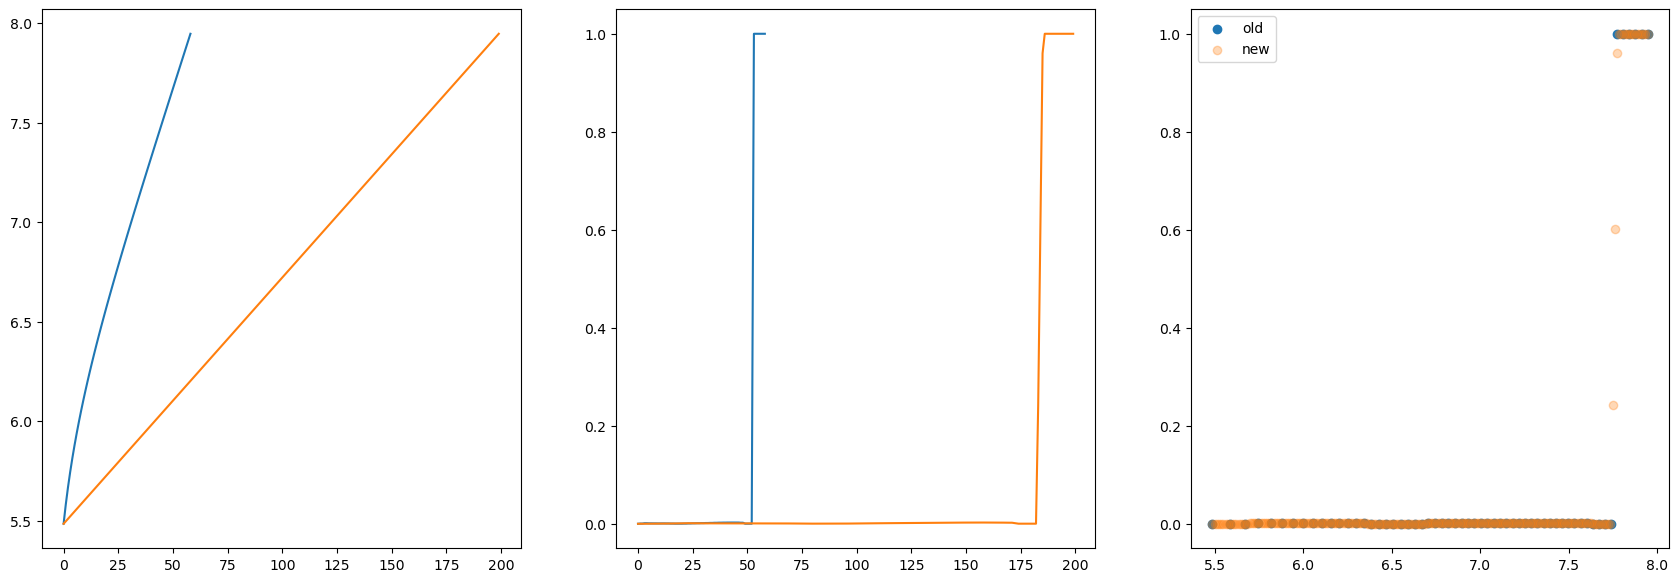

In [14]:
fig, ax = plt.subplots(1,3, figsize=(21,7))

ax[0].plot(x, label="old")
ax[0].plot(newx, label="new")

ax[1].plot(y, label="old")
ax[1].plot(newy, label="new")

ax[2].scatter(x, y, label="old")
ax[2].scatter(newx, newy, label="new",alpha=.3)

plt.legend()

In [33]:
out = np.column_stack([X[0][:,0], X[0][:,1]])
newout = np.column_stack([newx, newy])

df = pd.DataFrame(newout, columns = ['Column_A','Column_B'])
df

Column_A  Column_B
0    5.485249  0.000000
1    5.497614  0.000055
2    5.509979  0.000110
3    5.522344  0.000165
4    5.534710  0.000220
..        ...       ...
195  7.896445  1.000000
196  7.908810  1.000000
197  7.921175  1.000000
198  7.933540  1.000000
199  7.945905  1.000000

[200 rows x 2 columns]

In [25]:
m_obj.mySeries[0].to_numpy().shape

(59, 2)

In [15]:
X[0].shape

(59, 2)

In [ ]:
def interpolate_series(series,
                       interpolation_pts=200,
                       kind="linear"):
    '''
    Function interpolates time series with timestamped
    values using scipy interp1d. Input series should
    be 2D where the 1st dimension is the length of the
    time series and the 2nd dimension is a time and value.
    
    ex: Series is of shape (60, 2). This indicates that
    the series is 60 points long where each point is a
    time and value.
    
    Input:
    series = np.array([[0, 0.1], [1, 0.2], ... [59, 6.0] ])
    series.shape = (60, 2)
    
    Output: Interpolating to 200 points using linear interp.
    newseries = np.array([[0, 0.1], [1, 0.111], ... [200, 6.0] ])
    series.shape = (200, 2)
    '''
    x = series[:, 0]
    y = series[:, 1]
    f = interpolate.interp1d(x, y, kind=kind)
    newx = np.linspace(x.min(), x.max(), interpolation_pts)
    newy = f(newx)
    newseries = np.column_stack((newx, newy))
    return newseries
    
def 